**Name: Rana Mohamed**

**ID : 5**

**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Exploring data**

In [ ]:
data=pd.read_csv("diabetes.csv")

'''
ID of the patient
Gender of the patient
no of Pregnancies
Glucose level
BloodPressure level
SkinThickness
Insulin

BMI  --> Body Mass Index (BMI) Body mass index (BMI) is a tool that healthcare providers use to estimate the amount of body fat by using your height and weight measurements.normal group (diabetic patients) is 23.70, pre-obese group (diabetic patients) is 27.16 and obese group (diabetic patients) is 32.11.

DiabetesPedigreeFunction ->a function that scores the probability of diabetes based on family history

Age
Outcome
'''
data.head()

,ID,Gender,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,Female,6,148,72,35,0,33.6,0.627,50.0,1
1,2,Female,1,85,66,29,0,26.6,0.351,31.0,0
2,3,Male,8,183,64,0,0,23.3,0.672,32.0,1
3,4,Male,1,89,66,23,94,28.1,0.167,21.0,0
4,5,Female,0,137,40,35,168,43.1,2.288,33.0,1


In [ ]:
print(data.shape)
#info about data
data.info()

(800, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        800 non-null    int64  
 1   Gender                    800 non-null    object 
 2   Pregnancies               800 non-null    int64  
 3   Glucose                   800 non-null    int64  
 4   BloodPressure             800 non-null    int64  
 5   SkinThickness             800 non-null    int64  
 6   Insulin                   800 non-null    int64  
 7   BMI                       800 non-null    float64
 8   DiabetesPedigreeFunction  787 non-null    float64
 9   Age                       784 non-null    float64
 10  Outcome                   800 non-null    int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 68.9+ KB


In [ ]:
data.describe()

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,787.000000,784.000000,800.000000
mean,400.5000,3.848750,121.047500,68.876250,20.225000,80.330000,31.834375,0.473583,33.473214,0.352500
std,231.0844,3.356703,31.997422,19.779028,15.988712,118.388876,8.080507,0.338200,11.886406,0.478047
min,1.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,200.7500,1.000000,99.000000,62.000000,0.000000,0.000000,27.100000,0.238500,24.000000,0.000000
50%,400.5000,3.000000,117.000000,72.000000,23.000000,22.500000,32.000000,0.374000,29.000000,0.000000
75%,600.2500,6.000000,140.000000,80.000000,32.000000,129.250000,36.500000,0.621500,41.000000,1.000000
max,800.0000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# the most important column -> outcome which is either 0 for non-diabetic cases  , 1 for diabetic cases
data['Outcome'].value_counts()

,count
Outcome,
0,518
1,282


**Data Cleaning**

In [ ]:
data.isnull().sum()

,0
ID,0
Gender,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,13
Age,16


In [ ]:
# as diabetes depends on age feature and also the DiabetesPedigreeFunction
#so it is better to drop the null values rather than filling them with the average
data = data.dropna(subset=['Age', 'DiabetesPedigreeFunction'])
data.isnull().sum()

,0
ID,0
Gender,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0


In [ ]:
data.shape

(773, 11)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.describe()

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000
mean,403.349288,3.865459,121.227684,69.113842,20.213454,80.914618,31.888228,0.474911,33.481242,0.355757
std,231.104376,3.351206,31.772547,19.373343,15.860376,119.145318,7.943522,0.338217,11.884972,0.479052
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,202.000000,1.000000,99.000000,62.000000,0.000000,0.000000,27.100000,0.240000,24.000000,0.000000
50%,407.000000,3.000000,117.000000,72.000000,23.000000,23.000000,32.000000,0.374000,29.000000,0.000000
75%,603.000000,6.000000,141.000000,80.000000,32.000000,130.000000,36.500000,0.624000,41.000000,1.000000
max,800.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Data Visualization

<Axes: ylabel='count'>

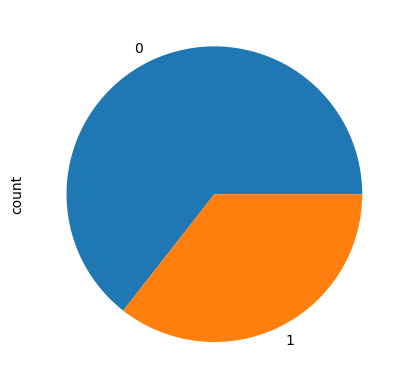

In [ ]:
data['Outcome'].value_counts().plot(kind="pie")

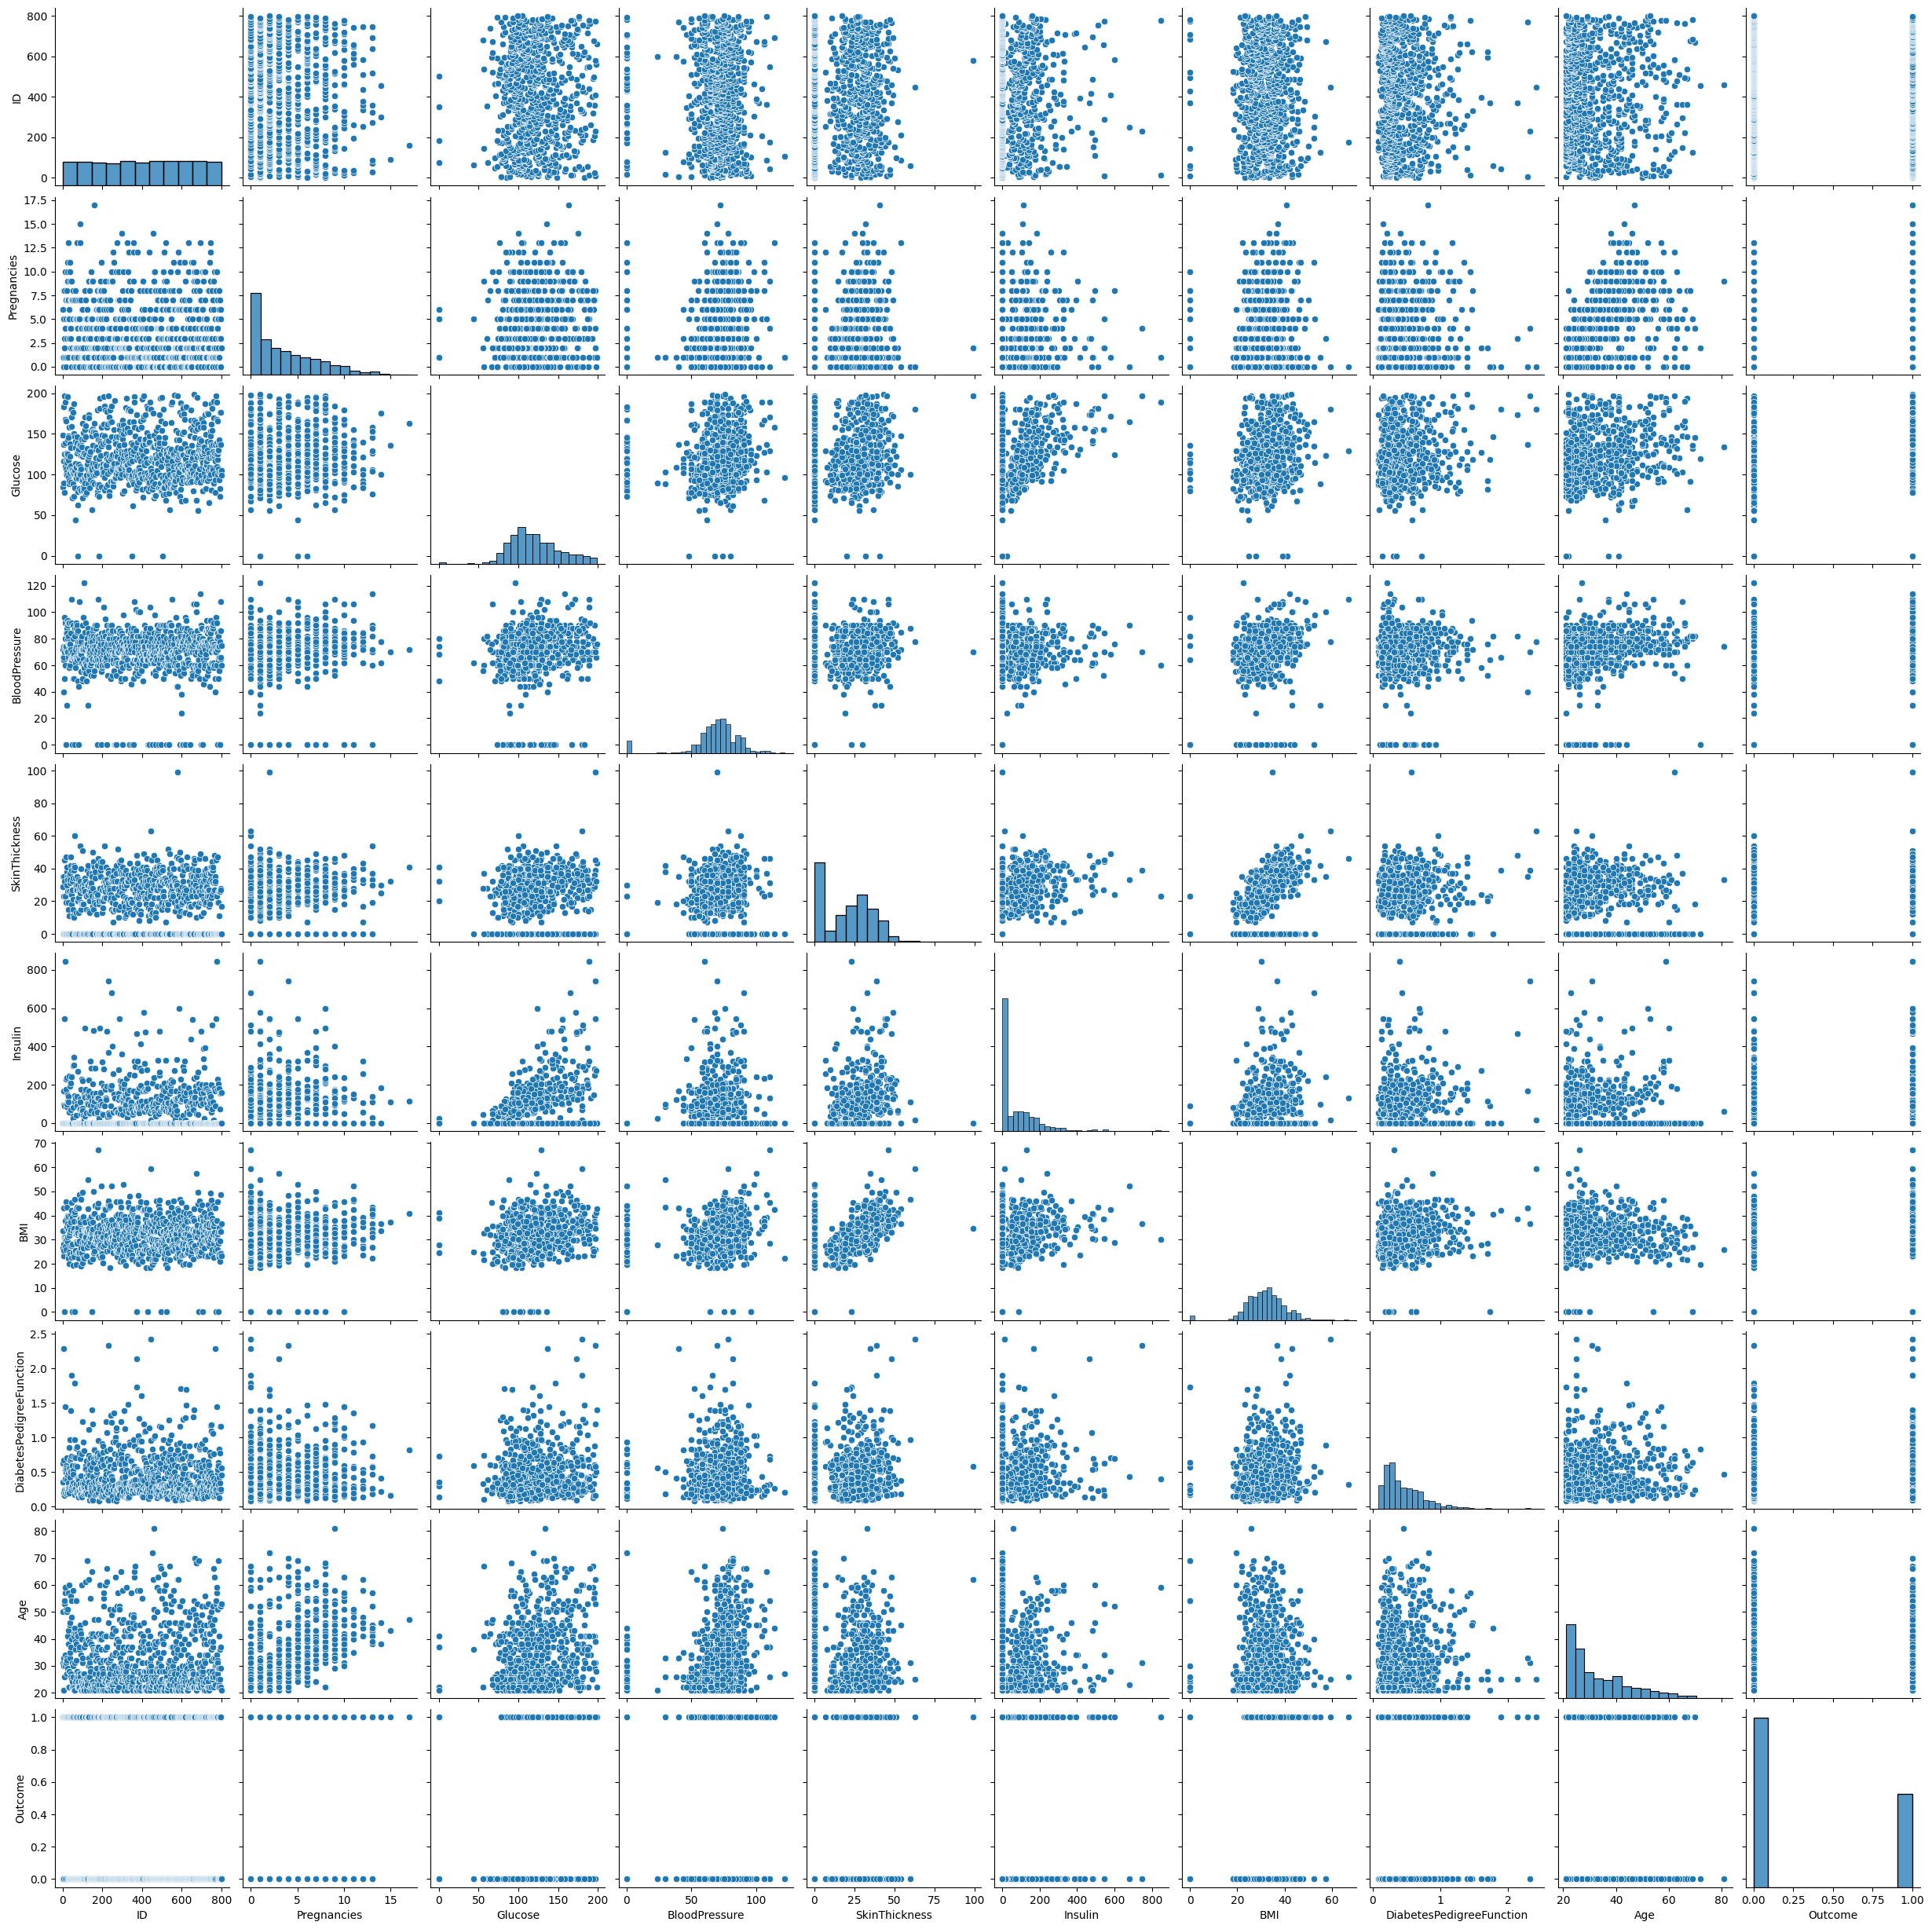

In [ ]:
sns.pairplot(data)

<Axes: xlabel='Age'>

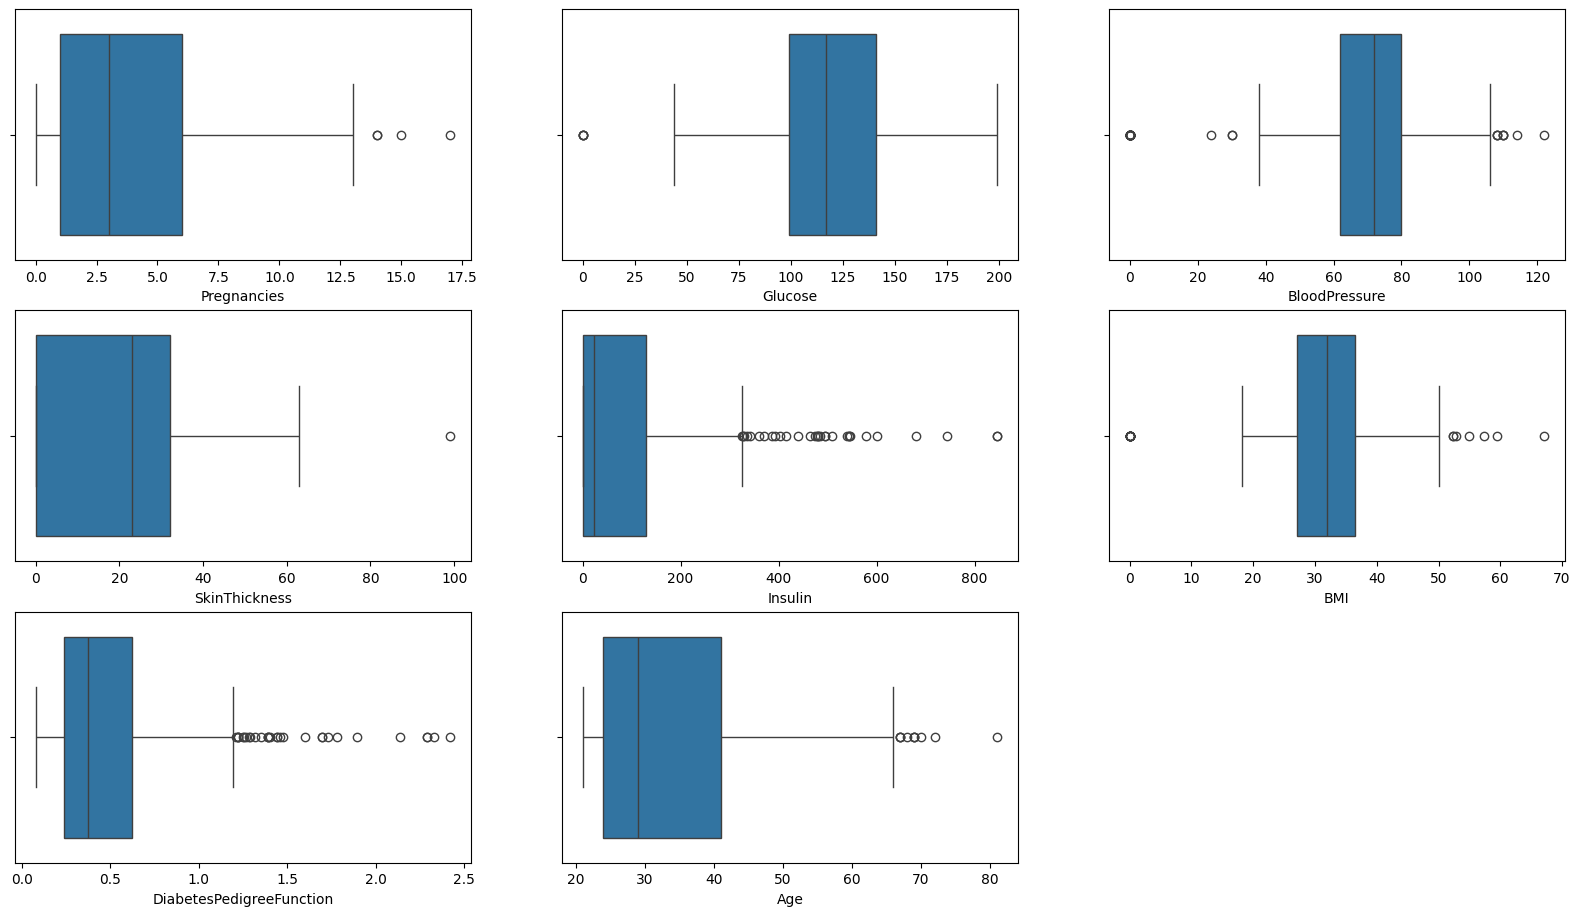

In [ ]:
#using boxplot to assuring the existence of outliers
plt.figure(figsize=(20,15))
plt.subplot(4,3,1)
sns.boxplot(x=data['Pregnancies'])

plt.subplot(4,3,2)
sns.boxplot(x=data['Glucose'])

plt.subplot(4,3,3)
sns.boxplot(x=data['BloodPressure'])

plt.subplot(4,3,4)
sns.boxplot(x=data['SkinThickness'])

plt.subplot(4,3,5)
sns.boxplot(x=data['Insulin'])

plt.subplot(4,3,6)
sns.boxplot(x=data['BMI'])

plt.subplot(4,3,7)
sns.boxplot(x=data['DiabetesPedigreeFunction'])

plt.subplot(4,3,8)
sns.boxplot(x=data['Age'])


Handling Outiers

In [ ]:
#estimate number of outliers
def count_outliers(data, column):
  q1 = data[column].quantile(0.25)
  q3 = data[column].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
  return len(outliers)

for column in ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']:
  num_outliers = count_outliers(data, column)
  print(f"Number of outliers in {column}: {num_outliers}")

#removing outliers that exceeds upper or lower bound
def remove_outliers(data, column):
  q1 = data[column].quantile(0.25)
  q3 = data[column].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
  return data

for column in ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']:
  data = remove_outliers(data, column)

data.describe()


Number of outliers in Pregnancies: 4
Number of outliers in Glucose: 4
Number of outliers in BloodPressure: 46
Number of outliers in SkinThickness: 1
Number of outliers in Insulin: 31
Number of outliers in BMI: 19
Number of outliers in DiabetesPedigreeFunction: 30
Number of outliers in Age: 10


,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,405.065625,3.814062,118.959375,71.954688,20.490625,69.698437,31.889687,0.428398,32.646875,0.310937
std,229.475121,3.244081,29.028100,11.373285,15.131450,84.368285,6.332292,0.248894,10.937595,0.463239
min,1.000000,0.000000,44.000000,38.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,203.750000,1.000000,99.000000,64.000000,0.000000,0.000000,27.200000,0.238000,24.000000,0.000000
50%,412.500000,3.000000,114.000000,72.000000,23.000000,42.500000,32.000000,0.359500,29.000000,0.000000
75%,600.250000,6.000000,137.000000,80.000000,32.000000,125.250000,35.900000,0.586000,40.000000,1.000000
max,800.000000,13.000000,198.000000,106.000000,60.000000,335.000000,49.300000,1.174000,65.000000,1.000000


In [ ]:
data.shape

(640, 11)

**Checking Unique Values**

In [ ]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
data.reset_index(inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     640 non-null    int64  
 1   ID                        640 non-null    int64  
 2   Gender                    640 non-null    object 
 3   Pregnancies               640 non-null    int64  
 4   Glucose                   640 non-null    int64  
 5   BloodPressure             640 non-null    int64  
 6   SkinThickness             640 non-null    int64  
 7   Insulin                   640 non-null    int64  
 8   BMI                       640 non-null    float64
 9   DiabetesPedigreeFunction  640 non-null    float64
 10  Age                       640 non-null    float64
 11  Outcome                   640 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 60.1+ KB


**Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data.head()

,index,ID,Gender,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,1,0,6,148,72,35,0,33.6,0.627,50.0,1
1,1,2,0,1,85,66,29,0,26.6,0.351,31.0,0
2,2,3,1,8,183,64,0,0,23.3,0.672,32.0,1
3,3,4,1,1,89,66,23,94,28.1,0.167,21.0,0
4,5,6,1,5,116,74,0,0,25.6,0.201,30.0,0


In [ ]:
print(le.classes_)
print(le.transform(le.classes_))

['Female' 'Male']
[0 1]


**Dropping unnecessary columns**

In [ ]:
data = data.drop(['index','ID'],axis=1)

**Feature Engineering**

In [ ]:
data.corr()

,Gender,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Gender,1.000000,-0.010728,0.009813,0.092008,-0.033273,-0.059308,-0.006114,0.048072,-0.016955,0.005929
Pregnancies,-0.010728,1.000000,0.130657,0.217064,-0.094386,-0.106064,0.039444,-0.001236,0.571288,0.222853
Glucose,0.009813,0.130657,1.000000,0.243303,0.027654,0.290337,0.184843,0.081217,0.277487,0.490897
BloodPressure,0.092008,0.217064,0.243303,1.000000,0.030847,-0.023421,0.288396,0.053128,0.356158,0.180899
SkinThickness,-0.033273,-0.094386,0.027654,0.030847,1.000000,0.476691,0.382605,0.171556,-0.121498,0.055004
Insulin,-0.059308,-0.106064,0.290337,-0.023421,0.476691,1.000000,0.183527,0.230079,-0.057905,0.123209
BMI,-0.006114,0.039444,0.184843,0.288396,0.382605,0.183527,1.000000,0.155485,0.059655,0.268751
DiabetesPedigreeFunction,0.048072,-0.001236,0.081217,0.053128,0.171556,0.230079,0.155485,1.000000,0.051002,0.177098
Age,-0.016955,0.571288,0.277487,0.356158,-0.121498,-0.057905,0.059655,0.051002,1.000000,0.275285
Outcome,0.005929,0.222853,0.490897,0.180899,0.055004,0.123209,0.268751,0.177098,0.275285,1.000000


<Axes: >

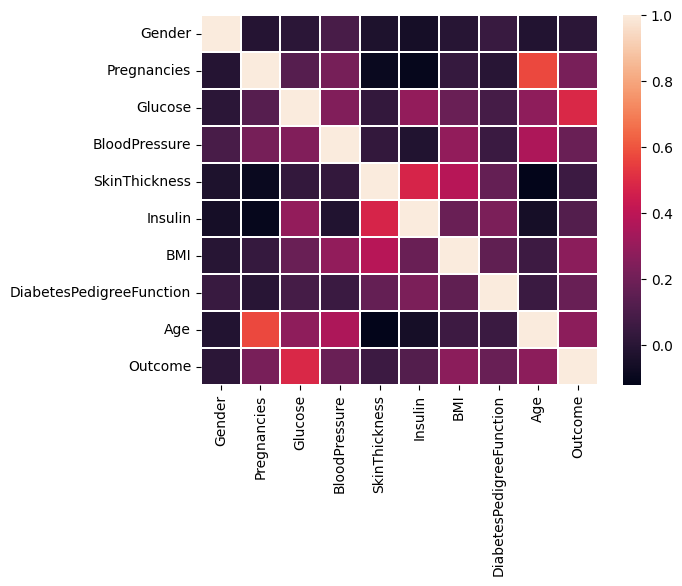

In [ ]:
sns.heatmap(data.corr(),linewidths=0.1)

In [ ]:
#feature selection
correlation = data.corr()['Outcome']
## 0.2 and -0.2 as thresholds performs better than 0.3 and -0.3 in this case as i tried several values
## 0.3 and -0.3 would eliminate most of the features leaving only one feature
# And we could see from the heat map that there is a high correlation between Outcome and (Glucose,BMI,Age,Insulin) so i chose 0.2,-0.2 as thresholds
columns_to_drop = correlation[(correlation > -0.2) & (correlation < 0.2)].index
data = data.drop(columns=columns_to_drop)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pregnancies  640 non-null    int64  
 1   Glucose      640 non-null    int64  
 2   BMI          640 non-null    float64
 3   Age          640 non-null    float64
 4   Outcome      640 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 25.1 KB


**Training - Testing Split**

In [ ]:
from sklearn.model_selection import train_test_split

x = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [ ]:
print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)


X_train Shape:  (448, 4)
X_test Shape:  (192, 4)
y_train Shape:  (448,)
y_test Shape:  (192,)


**Standard Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
Lg= LogisticRegression()
Lg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_test_pred=Lg.predict(X_test)
print(y_test_pred)

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 1
 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 1 0 0 0 0]


In [ ]:
print(y_test)

570    0
265    0
291    0
597    0
174    0
      ..
571    1
9      1
318    0
264    0
363    0
Name: Outcome, Length: 192, dtype: int64


In [ ]:
print(len(y_test_pred))

192


**Logistic Regression Model Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_test_pred)
print( f'Logistic Regression Accuracy is {accuracy }')

Logistic Regression Accuracy is 0.8020833333333334


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
show = pd.DataFrame(cm,columns=["Predicted_Yes","Predicted_No"],index=["Actual_Yes","Actual_No"])
show.head()

,Predicted_Yes,Predicted_No
Actual_Yes,120,10
Actual_No,28,34
